In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
ds = xr.open_dataset("../data/raw/era5_60.17_24.94_2023.nc")
ds

<xarray.Dataset> Size: 841kB
Dimensions:     (valid_time: 8760, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23...
  * latitude    (latitude) float64 24B 60.42 60.17 59.92
  * longitude   (longitude) float64 24B 24.69 24.94 25.19
    expver      (valid_time) <U4 140kB ...
Data variables:
    u100        (valid_time, latitude, longitude) float32 315kB ...
    v100        (valid_time, latitude, longitude) float32 315kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-24T11:18 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
speed = np.hypot(ds["u100"], ds["v100"]).to_series()
print(speed.describe())

count    78840.000000
mean         7.029393
std          3.442437
min          0.015630
25%          4.566404
50%          6.630968
75%          9.063570
max         23.388973
Name: u100, dtype: float64


In [4]:
pd.DataFrame({"Wind_speed_100m": speed}).describe()

,Wind_speed_100m
count,78840.000000
mean,7.029393
std,3.442437
min,0.015630
25%,4.566404
50%,6.630968
75%,9.063570
max,23.388973


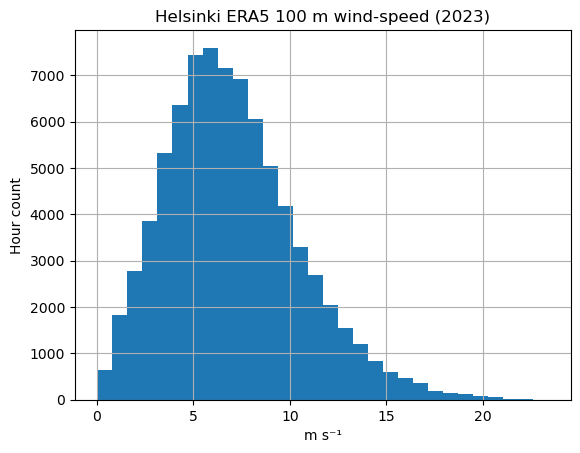

In [5]:
speed.hist(bins=30)
plt.title("Helsinki ERA5 100 m wind-speed (2023)")
plt.xlabel("m s⁻¹"); plt.ylabel("Hour count")
plt.show()


Text(0.5, 1.0, 'Wind direction rose (°)')

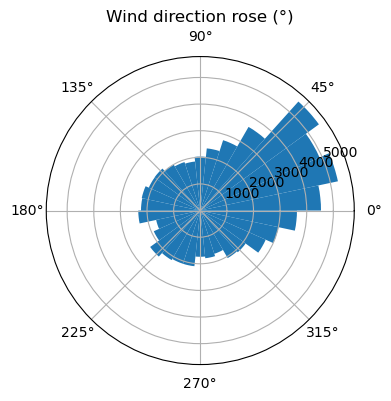

In [6]:
import matplotlib.pyplot as plt
direction = np.degrees(np.arctan2(ds["v100"], ds["u100"])).to_series() % 360
plt.figure(figsize=(4,4))
plt.subplot(projection="polar")
plt.hist(np.radians(direction), bins=30, weights=np.ones_like(direction))
plt.title("Wind direction rose (°)")


In [7]:
ds = xr.open_dataset("../data/raw/era5_60.17_24.94_2023.nc")
speed = np.hypot(ds["u100"], ds["v100"]).to_series()

summary = {
    "Hours": len(speed),
    "Missing": speed.isna().sum(),
    "Median (m/s)": speed.median().round(2),
    "95-th percentile (m/s)": speed.quantile(0.95).round(2),
}
for k, v in summary.items():
    print(f"{k:25s} {v}")

Hours                     78840
Missing                   0
Median (m/s)              6.630000114440918
95-th percentile (m/s)    13.36


**2023 ERA5 single-point climatology (lat 60.17 lon 24.94)**  
Hours                     78840
Missing                   0
Median (m/s)              6.630000114440918
95-th percentile (m/s)    13.36